# Import pandas, scipy and sklearn packages

In [336]:
import pandas as pd
import scipy.stats
import math
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelBinarizer, LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score, classification_report
from sklearn import tree
from itertools import repeat
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_curve, precision_recall_curve, confusion_matrix
import matplotlib.pyplot as plt

# Data Understanding



### Importing data

In [337]:
data = pd.read_csv('2015.csv')

### Showing statistical information of every column

In [338]:
data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


### Showing the top first 10 rows

In [339]:
data.head(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


### Showing the unique values for each column

In [340]:
data_uniques = pd.DataFrame([[i, len(data[i].unique())] for i in data.columns], columns=['Variable', 'Unique Values']).set_index('Variable')
data_uniques

,Unique Values
Variable,
Country,158
Region,10
Happiness Rank,157
Happiness Score,157
Standard Error,153
Economy (GDP per Capita),158
Family,158
Health (Life Expectancy),157
Freedom,158


### Showing every columns and their respective data type

In [341]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

#### Looks like every value is continuous except <b>Region and Country.</b>We will be not using <b>Country</b> since all data points have a unique value. We will use the variable <b>Region</b> for classification.

### Converting <b>Country</b> using get_dummies would increase the number of features to rows*num_of_countries. So it's unreliable to do that.We will only convert <b>Region</b>

In [342]:
categorical_variables = ['Region']
data = pd.get_dummies(data, columns = categorical_variables, drop_first=True)
data.head()

,Country,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Region_Central and Eastern Europe,Region_Eastern Asia,Region_Latin America and Caribbean,Region_Middle East and Northern Africa,Region_North America,Region_Southeastern Asia,Region_Southern Asia,Region_Sub-Saharan Africa,Region_Western Europe
0,Switzerland,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,0,0,0,0,0,0,0,0,1
1,Iceland,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,0,0,0,0,0,0,0,0,1
2,Denmark,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,0,0,0,0,0,0,0,0,1
3,Norway,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,0,0,0,0,0,0,0,0,1
4,Canada,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,0,0,0,0,1,0,0,0,0


## Separating data into X(features we will use to predict y) and y(value we are trying to predict). We drop columns using the drop() function

### Dropping <b>'Standard Error', 'Happiness Rank'</b> since they will not be helpful in the model.
### Dropping <b>'Happiness Score'</b> since we are using it as the predicted value.
### Dropping <b>'Dystopia Residual'</b> beacause including this feature would overfit the model.
### Dropping <b>'Country'</b> beacause it is unreliable given the number of data points.

In [343]:
X = data.drop(columns=['Happiness Score', 'Dystopia Residual', 'Standard Error', 'Happiness Rank', 'Country'], axis=1)
y = data['Happiness Score']

## Generating the correlation of every column in X with y and displaying them

In [344]:
correlations = X.corrwith(y)
correlations.sort_values(inplace=True)
correlations

Region_Sub-Saharan Africa                -0.598318
Region_Southern Asia                     -0.149944
Region_Central and Eastern Europe        -0.017781
Region_Southeastern Asia                 -0.012551
Region_Middle East and Northern Africa    0.010395
Region_Eastern Asia                       0.043593
Generosity                                0.180319
Region_North America                      0.188213
Region_Latin America and Caribbean        0.270962
Trust (Government Corruption)             0.395199
Region_Western Europe                     0.450688
Freedom                                   0.568211
Health (Life Expectancy)                  0.724200
Family                                    0.740605
Economy (GDP per Capita)                  0.780966
dtype: float64

## Visualizing the correlation in a barchart

[(-1.0, 1.0), Text(0, 0.5, 'pearson correlation')]

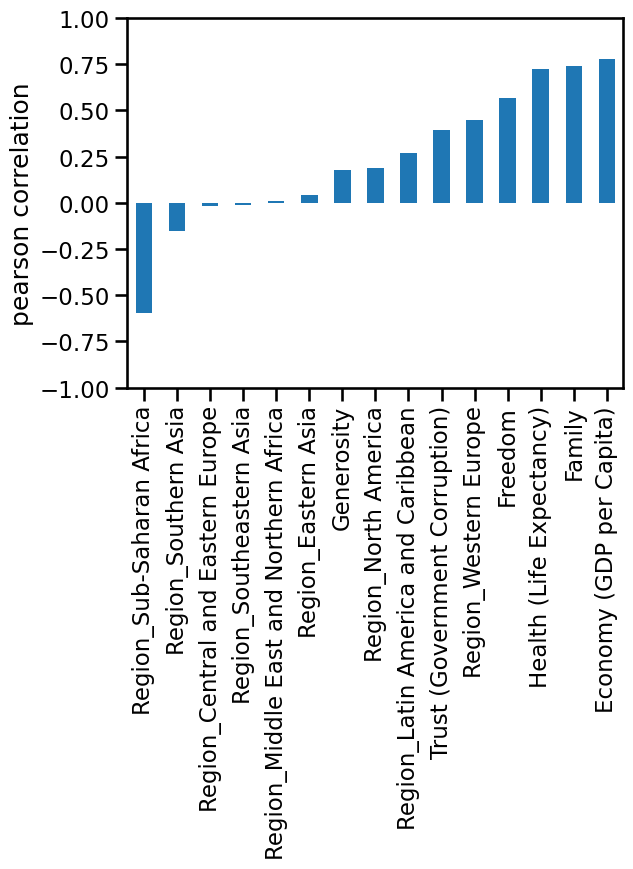

In [345]:
ax = correlations.plot(kind='bar')
ax.set(ylim=[-1, 1], ylabel='pearson correlation');

we will consider top 4 correlations, <b>Health, Family, Freedom, and Economy</b>.


In [346]:
km = KMeans(n_clusters=9, init = "k-means++", max_iter = 300, n_init = 10)
km = km.fit(X)
x = X.copy()
y_clusters = km.fit_predict(x)
from mpl_toolkits.mplot3d import Axes3D

In [347]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [348]:
lr = LinearRegression()
lr = lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
score = r2_score(y_test, y_pred)
print(score)

0.8498704274875648


In [349]:
lr.coef_

array([ 1.00613606,  1.02200857,  0.58874552,  0.93468821,  0.72667496,
        0.69846749, -0.55906408, -0.76426975,  0.00837158, -0.52734702,
        0.13897119, -0.60836894, -0.47457187, -0.67264581, -0.19738688])

Linear Regression with only 4 features

In [350]:
features = ['Health (Life Expectancy)', 'Economy (GDP per Capita)', 'Family', 'Freedom']
X_4 = data[features]
y_4 = data['Happiness Score']
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_4,y_4, test_size=0.3, random_state=42)
lr = LinearRegression()
lr = lr.fit(X_train_4, y_train_4)
y_pred = lr.predict(X_test_4)
score = r2_score(y_test_4, y_pred)
print(score)

0.8103612412764385


Looks like getting rid of features would reduce model accuracy

In [351]:
def get_processed_df(data):
    categorical_variables = ['Region']
    data = pd.get_dummies(data, columns = categorical_variables, drop_first=True)
    variables = [x for x in data.columns if x.startswith('Region')]
    y = data['Region_Sub-Saharan Africa']
    X = data.drop(columns = variables)
    return X,y

In [352]:
files = ['2015.csv', '2016.csv']#, '2017.csv', '2018.csv', '2019.csv']

data_list = list()
for name in files:
    data = pd.read_csv(name)
    data_list.append(data)


In [353]:
df = pd.concat(data_list)

In [354]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 315 entries, 0 to 156
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        315 non-null    object 
 1   Region                         315 non-null    object 
 2   Happiness Rank                 315 non-null    int64  
 3   Happiness Score                315 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       315 non-null    float64
 6   Family                         315 non-null    float64
 7   Health (Life Expectancy)       315 non-null    float64
 8   Freedom                        315 non-null    float64
 9   Trust (Government Corruption)  315 non-null    float64
 10  Generosity                     315 non-null    float64
 11  Dystopia Residual              315 non-null    float64
 12  Lower Confidence Interval      157 non-null    flo

In [355]:
X_c, y_c = get_processed_df(df)

In [356]:
X_c.head()

,Country,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Lower Confidence Interval,Upper Confidence Interval
0,Switzerland,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,NaN,NaN
1,Iceland,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,NaN,NaN
2,Denmark,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,NaN,NaN
3,Norway,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,NaN,NaN
4,Canada,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,NaN,NaN


In [357]:
X_c = X_c.drop(columns=['Lower Confidence Interval','Upper Confidence Interval','Dystopia Residual','Happiness Rank', 'Country', 'Standard Error'])

In [358]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
fields = X_c.columns
X_c = mm.fit_transform(X_c)
X_c = pd.DataFrame(X_c, columns=fields )

In [359]:
X_c.describe()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
count,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000
mean,0.534951,0.493259,0.636591,0.579424,0.597100,0.254628,0.292734
std,0.240424,0.225175,0.204473,0.234860,0.224991,0.209255,0.158686
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.351938,0.326103,0.527645,0.409310,0.441805,0.111096,0.184736
50%,0.515375,0.533397,0.668885,0.624677,0.616950,0.192296,0.266606
75%,0.722409,0.673694,0.775451,0.768242,0.771550,0.323622,0.379951
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [360]:
y_c

0      0
1      0
2      0
3      0
4      0
      ..
152    1
153    0
154    1
155    0
156    1
Name: Region_Sub-Saharan Africa, Length: 315, dtype: uint8

In [361]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c,y_c, test_size=0.3, random_state=42)
dt = DecisionTreeClassifier()
dt = dt.fit(X_train_c, y_train_c)
y_pred_c = dt.predict(X_test_c)

In [362]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred),
                      'recall': recall_score(y_true, y_pred),
                      'f1': f1_score(y_true, y_pred)},
                      name=label)

In [363]:
train_test_dt_error = pd.concat([measure_error(y_test_c, y_pred_c, 'Error')],
                                axis=1)

In [364]:
train_test_dt_error

,Error
accuracy,0.905263
precision,0.833333
recall,0.800000
f1,0.816327


In [365]:
dt.tree_.node_count, dt.tree_.max_depth

(19, 6)

In [366]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':range(1, dt.tree_.max_depth+1, 2),
              'max_features': range(1, len(dt.feature_importances_)+1)}

GR = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid=param_grid,
                  scoring='accuracy',
                  n_jobs=-1)

GR = GR.fit(X_train_c, y_train_c)

In [367]:
y_pred_gr = GR.predict(X_test_c)

train_test_gr_error = pd.concat([measure_error(y_test_c, y_pred_gr, 'Error')],
                                axis=1)

In [368]:
train_test_gr_error

,Error
accuracy,0.915789
precision,0.840000
recall,0.840000
f1,0.840000


In [369]:
GR.best_estimator_

DecisionTreeClassifier(max_depth=3, max_features=5, random_state=42)

In [370]:
dt_best = DecisionTreeClassifier(max_features=5, max_depth= 3, random_state=42)
dt_best = dt_best.fit(X_train_c, y_train_c)
y_pred_dt = dt_best.predict(X_test_c)

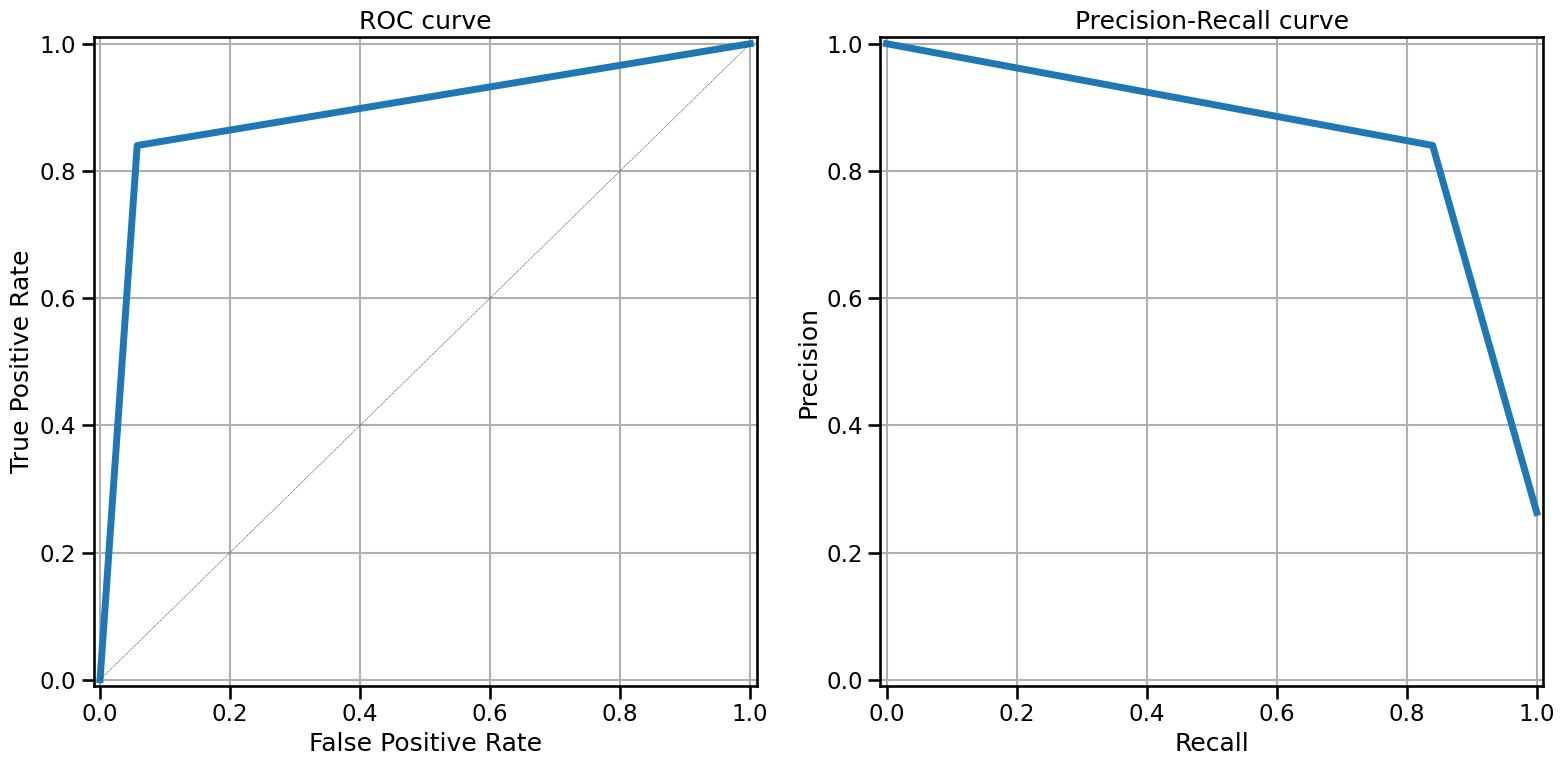

In [371]:
sns.set_context('talk')

fig, axList = plt.subplots(ncols=2)
fig.set_size_inches(16, 8)

# Get the probabilities for each of the two categories
y_prob = dt_best.predict_proba(X_test_c)

# Plot the ROC-AUC curve
ax = axList[0]

fpr, tpr, thresholds = roc_curve(y_test_c, y_prob[:,1])
ax.plot(fpr, tpr, linewidth=5)
# It is customary to draw a diagonal dotted line in ROC plots.
# This is to indicate completely random prediction. Deviation from this
# dotted line towards the upper left corner signifies the power of the model.
ax.plot([0, 1], [0, 1], ls='--', color='black', lw=.3)
ax.set(xlabel='False Positive Rate',
       ylabel='True Positive Rate',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='ROC curve')
ax.grid(True)

# Plot the precision-recall curve
ax = axList[1]

precision, recall, _ = precision_recall_curve(y_test_c, y_prob[:,1])
ax.plot(recall, precision, linewidth=5)
ax.set(xlabel='Recall', ylabel='Precision',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='Precision-Recall curve')
ax.grid(True)

plt.tight_layout()

In [372]:
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz

In [374]:
import pickle
pickle.dump(dt_best,open('dt_best.p','wb')) #wb = write bytes
dt_best = pickle.load(open('dt_best.p','rb')) #rb = read bytes